# **Regularization**

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Dropout
from tensorflow.keras.optimizers import Adam

In [24]:
X, y = make_moons(100, noise=0.25,random_state=2)

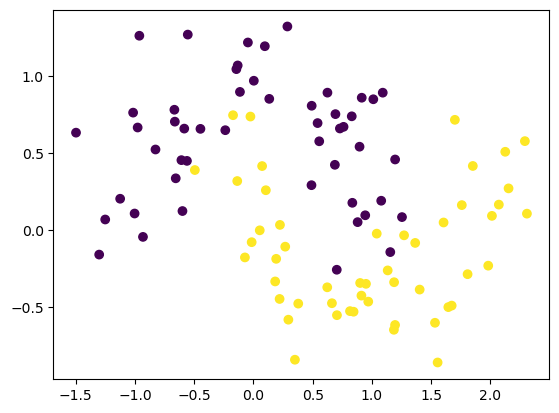

In [25]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

## **1. Without Regularization**

In [29]:
model1 = Sequential()

model1.add(Dense(128,activation='relu',input_dim=2))
model1.add(Dense(128,activation='relu'))
model1.add(Dense(1,activation='sigmoid'))
model1.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
adam = Adam(learning_rate=0.01)
model1.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'])

In [ ]:
history1 = model1.fit(X, y, epochs=2000, validation_split = 0.2,verbose=0)

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 41s 4ms/step


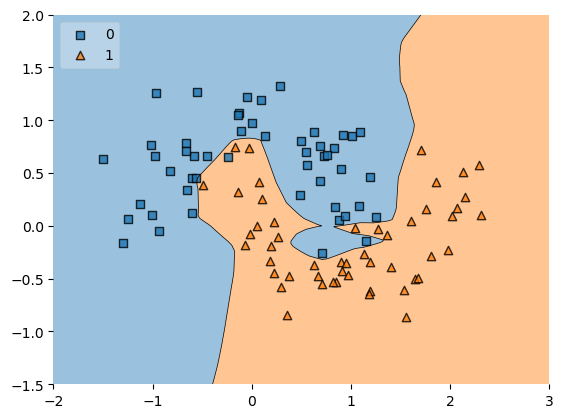

In [32]:
plot_decision_regions(X, y.astype('int'), clf=model1, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

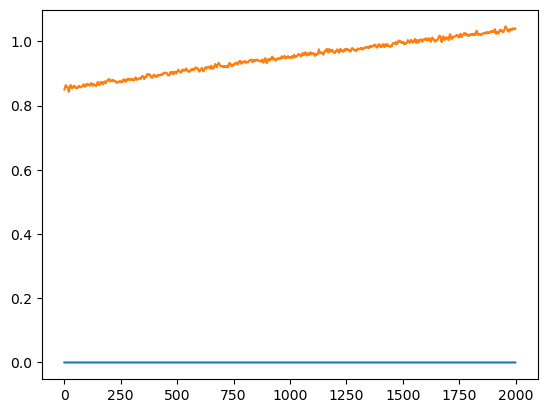

In [39]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])

## **L1 Regularization**

In [40]:
model2 = Sequential()

model2.add(Dense(128,activation='relu',input_dim=2,kernel_regularizer=tensorflow.keras.regularizers.l1(0.001)))
model2.add(Dense(128,activation='relu',kernel_regularizer=tensorflow.keras.regularizers.l1(0.001)))
model2.add(Dense(1,activation='sigmoid',))

model2.summary()

c:\Users\nasrullah\.conda\envs\tf_env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_22 (Dense)                │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [41]:
adam = Adam(learning_rate=0.01)
model2.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'])

In [42]:
history2 = model1.fit(X, y, epochs=2000, validation_split = 0.2,verbose=0)

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 9s 981us/step


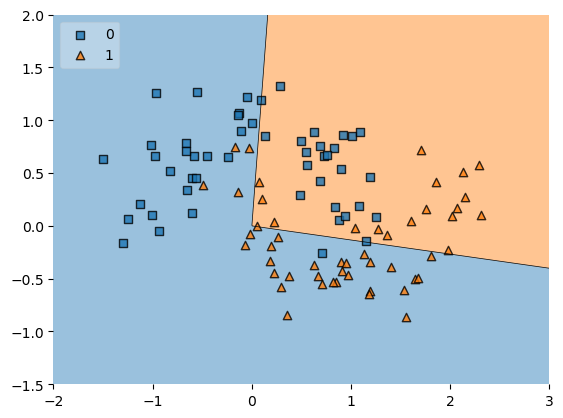

In [43]:
plot_decision_regions(X, y.astype('int'), clf=model2, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

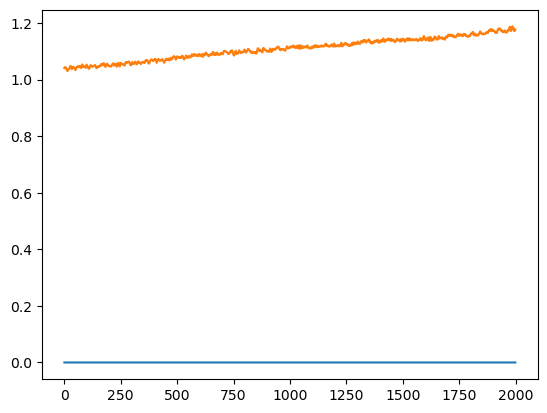

In [45]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])

In [47]:
model1_weight_layer1 = model1.get_weights()[0].reshape(256)
model2_weight_layer1 = model2.get_weights()[0].reshape(256)

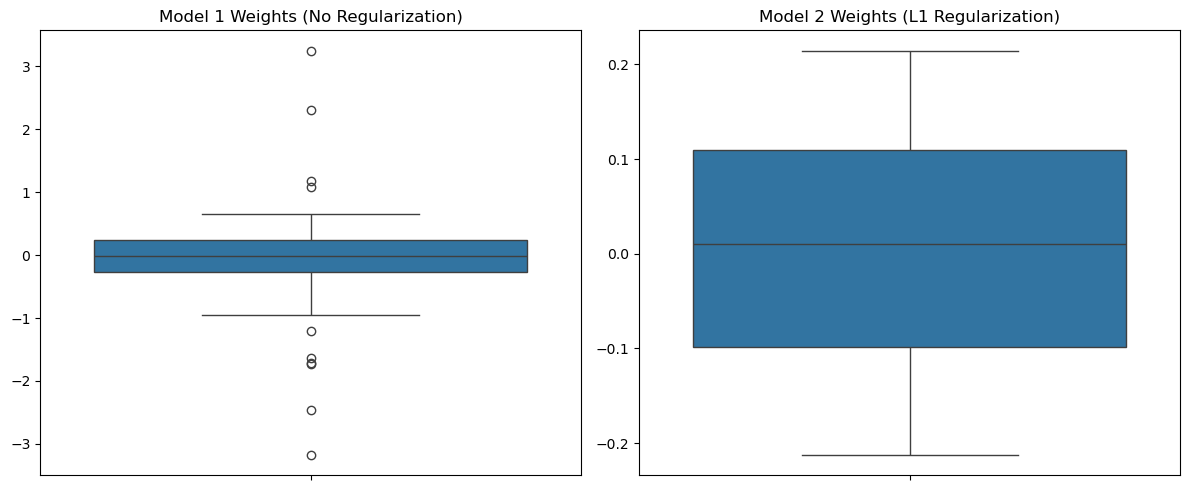

In [49]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(model1_weight_layer1)
plt.title('Model 1 Weights (No Regularization)')

plt.subplot(1, 2, 2)
sns.boxplot(model2_weight_layer1)
plt.title('Model 2 Weights (L1 Regularization)')

plt.tight_layout()
plt.show()

In [50]:
print(model1_weight_layer1.min())
print(model2_weight_layer1.min())

-3.1761234
-0.21257825


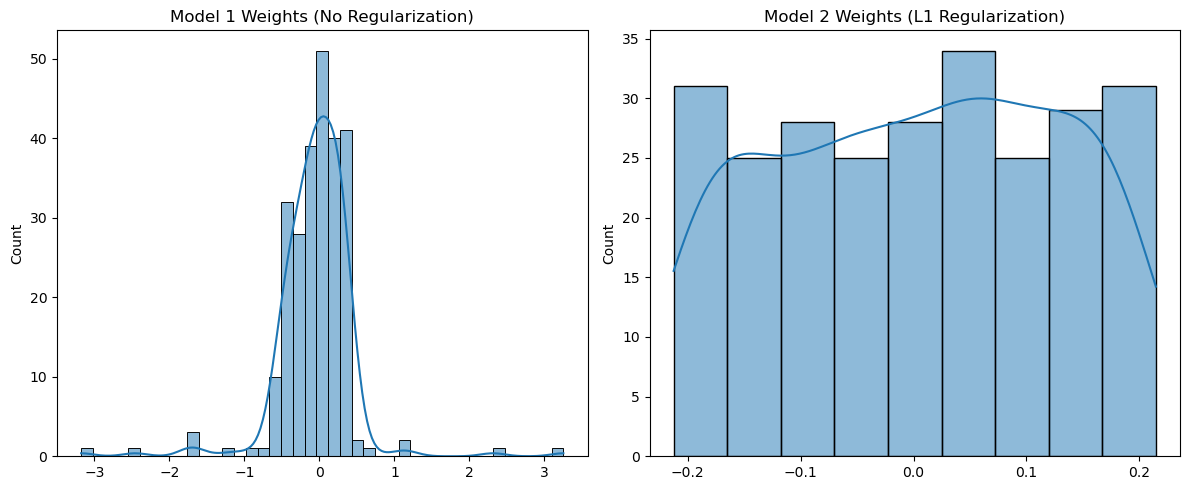

In [53]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(model1_weight_layer1, kde=True)
plt.title('Model 1 Weights (No Regularization)')

plt.subplot(1, 2, 2)
sns.histplot(model2_weight_layer1, kde=True)
plt.title('Model 2 Weights (L1 Regularization)')

plt.tight_layout()
plt.show()

## **L2 Regularization**

In [55]:
model3 = Sequential()

model3.add(Dense(128,activation='relu',input_dim=2,kernel_regularizer=tensorflow.keras.regularizers.l1(0.01)))
model3.add(Dense(128,activation='relu',kernel_regularizer=tensorflow.keras.regularizers.l1(0.01)))
model3.add(Dense(1,activation='sigmoid',))

model3.summary()

c:\Users\nasrullah\.conda\envs\tf_env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_28 (Dense)                │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [56]:
adam = Adam(learning_rate=0.01)
model3.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'])

In [57]:
history3 = model1.fit(X, y, epochs=2000, validation_split = 0.2,verbose=0)

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 35s 4ms/step


<Axes: >

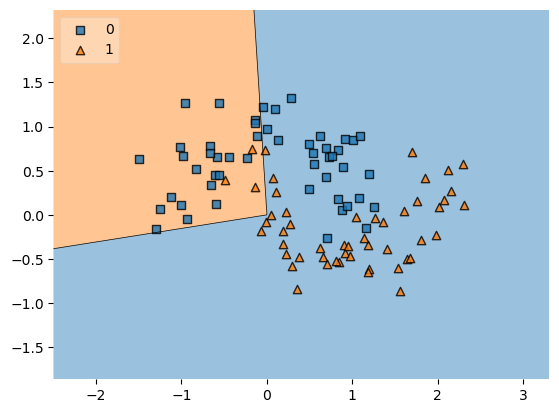

In [62]:
plot_decision_regions(X,y,clf=model3,legend=2)

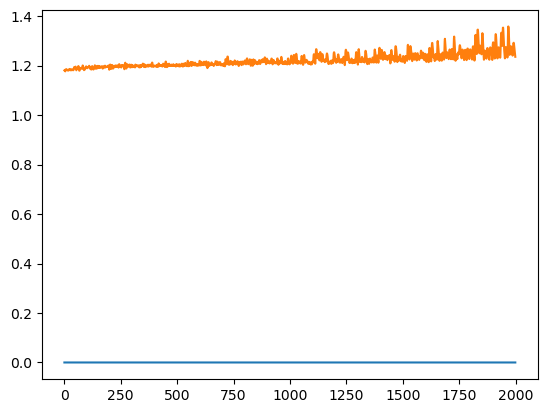

In [64]:
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])

In [58]:
model1_weight_layer1 = model1.get_weights()[0].reshape(256)
model2_weight_layer1 = model2.get_weights()[0].reshape(256)
model3_weight_layer1 = model3.get_weights()[0].reshape(256)

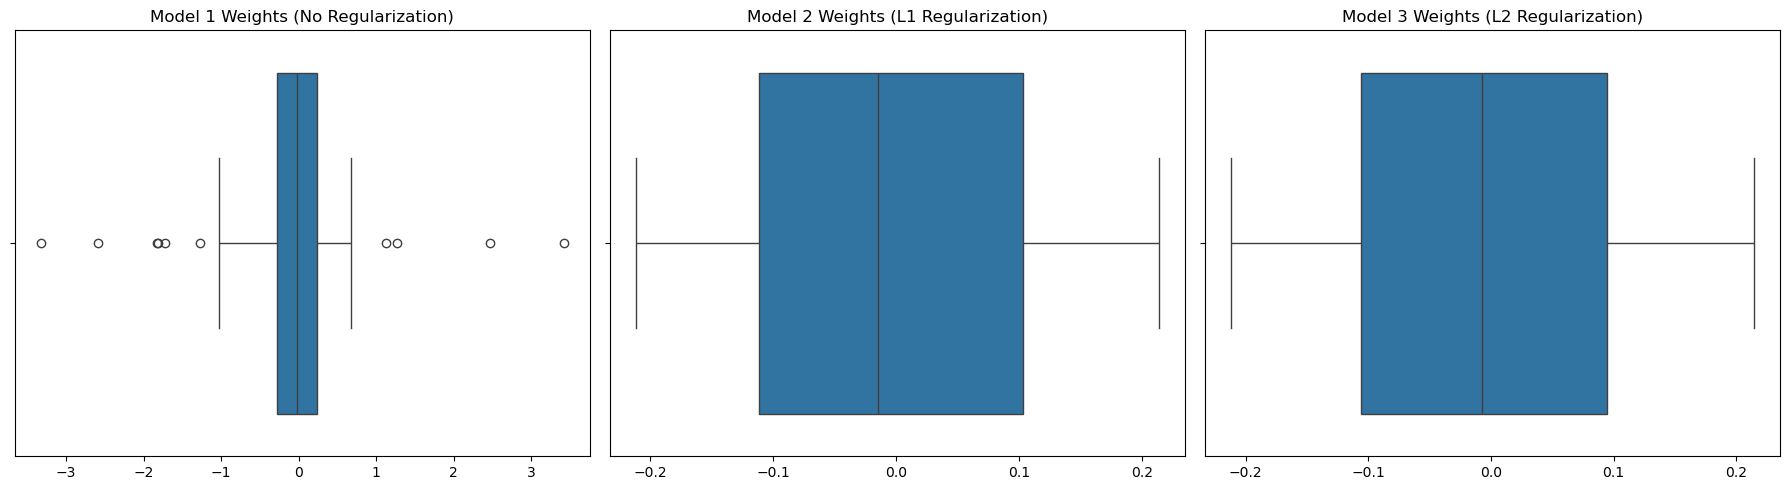

In [61]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x=model1_weight_layer1)
plt.title('Model 1 Weights (No Regularization)')

plt.subplot(1, 3, 2)
sns.boxplot(x=model2_weight_layer1)
plt.title('Model 2 Weights (L1 Regularization)')

plt.subplot(1, 3, 3)
sns.boxplot(x=model3_weight_layer1)
plt.title('Model 3 Weights (L2 Regularization)')

plt.tight_layout()
plt.show()

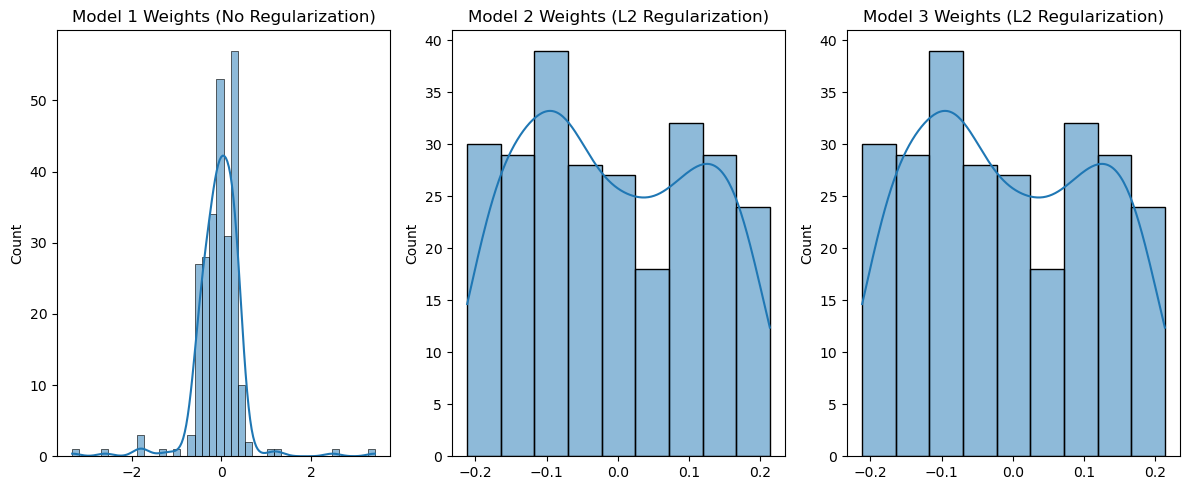

In [63]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
sns.histplot(model1_weight_layer1, kde=True)
plt.title('Model 1 Weights (No Regularization)')

plt.subplot(1, 3, 2)
sns.histplot(model2_weight_layer1, kde=True)
plt.title('Model 2 Weights (L2 Regularization)')

plt.subplot(1, 3, 3)
sns.histplot(model2_weight_layer1, kde=True)
plt.title('Model 3 Weights (L2 Regularization)')

plt.tight_layout()
plt.show()

In [67]:
model1.get_weights()[0].reshape(256)

array([-1.97066605e-01,  7.68273175e-02, -4.52442467e-01, -4.21998233e-01,
       -5.38104832e-01,  2.92451262e-01,  7.03734383e-02,  4.20950294e-01,
        2.85160899e-01, -3.00451070e-01, -2.37954780e-01,  4.51061577e-02,
        1.84577987e-01, -3.72316688e-01,  2.43474126e-01,  4.39240009e-01,
        1.78408206e-01, -3.03961307e-01, -4.28016901e-01, -1.54482692e-01,
        5.01270816e-02,  2.97290742e-01, -5.54900989e-02, -2.15639278e-01,
       -1.36730716e-01,  2.82512069e-01, -5.14329553e-01,  2.82523096e-01,
        1.56547278e-01, -3.19743514e-01, -4.31566775e-01, -3.43702137e-02,
        2.70829588e-01,  3.18833917e-01,  3.84886414e-01,  3.22140038e-01,
       -2.32073978e-01, -5.11793435e-01, -4.04629081e-01, -1.92207202e-01,
       -4.40016538e-01, -1.66243225e-01, -4.86406773e-01, -1.96959972e-01,
       -3.76554608e-01,  7.51565397e-02, -2.06862405e-01, -1.16915874e-01,
        1.58644840e-01, -5.08619130e-01,  2.60145098e-01, -2.56654352e-01,
        4.01741773e-01, -